# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Data Visuliasation
import seaborn as sns #Data Visuliasation

# Libraries for data preparation and model building
from statsmodels.graphics.correlation import plot_corr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")
df.drop(df.columns[0], axis=1, inplace=True) #Inplace: If False, return a copy. Otherwise, do operation inplace and return None.
df_test.drop(df_test.columns[0], axis=1, inplace=True)
df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Here we use various methods to take an in-depth look at our dataframe. These methods include:
<ol>
<li>info()</li>
<li>describe()</li>
<li>isna()</li>
<li>kurtosis()</li>
</ol>

In [3]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

We see from the above table that there are three categorical variables that need to be typecasted to numerical (Valencia_wind_deg and Seville_pressure) and datetime (time) type. 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


#### We look at the data statistics

We would like to see the variable statistics and interaction within each variable.

The following can be easily seen:

- temp_min, temp_max, temp variables for all the cities are significantly indifferent.
- There is a large difference between the max values and mean for most of the columns. This shows a lot of zero values collected during observation(the 2nd and 3rd percentiles prove!)

In [5]:
#Checking the features with null values
df.isna().sum().to_frame().sort_values(0).tail(3)

,0
Barcelona_rain_3h,0
load_shortfall_3h,0
Valencia_pressure,2068


We can see from the above table that only Valencia_pressure contains null values. 2068 (22.8%) null values is a lot of missing data for a column with 8763 rows!

In [6]:
df.kurtosis().to_frame().sort_values(0).tail(12)

<ipython-input-6-a0c43dc2598d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis().to_frame().sort_values(0).tail(12)


,0
Madrid_weather_id,9.259047
Seville_weather_id,10.710308
Bilbao_rain_1h,32.904656
Valencia_wind_speed,35.645426
Madrid_rain_1h,76.584491
Seville_rain_1h,93.840746
Barcelona_rain_1h,101.578931
Barcelona_rain_3h,187.800460
Seville_rain_3h,413.136592
Bilbao_snow_3h,806.128471


Kurtosis() help us detect outliers in our data. Typically, any feature with a kurtosis value > 10 be investigated or worst case, removed. The above table contain the sorted kurtisis values of the features in our dataframe.

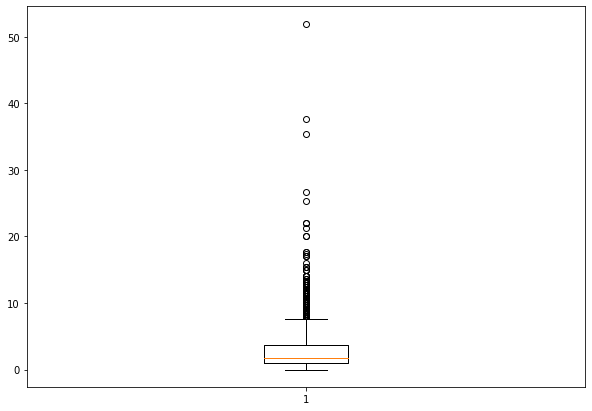

In [7]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Valencia_wind_speed'])
 
# show plot
plt.show()

All features with kurtusis value > 10 were investigated for the presence of outliers. However, because we are dealing with seasonal data, some of the features may seem as if they contain outliers but they do not. A box plot was then used to check for outliers, and only Valencia_wind_speed ontain an outlier.

---
Owing to the seasonal nature of some of our features, we suspect that the reason for the high kurtosis values that was observed is because these features contain a significant fraction of zero values.

In [8]:
lst = ['Seville_weather_id', 'Bilbao_rain_1h', 'Valencia_wind_speed', 
        'Madrid_rain_1h', 'Seville_rain_1h', 'Barcelona_rain_1h',
        'Barcelona_rain_3h', 'Seville_rain_3h', 'Bilbao_snow_3h',
        'Barcelona_pressure', 'Valencia_snow_3h']

lst2 = []

for i in lst:
    lst2.append(df[df[i] != 0.000000].shape[0])

list(zip(lst,lst2))

[('Seville_weather_id', 8763),
 ('Bilbao_rain_1h', 2594),
 ('Valencia_wind_speed', 8628),
 ('Madrid_rain_1h', 928),
 ('Seville_rain_1h', 854),
 ('Barcelona_rain_1h', 1297),
 ('Barcelona_rain_3h', 223),
 ('Seville_rain_3h', 90),
 ('Bilbao_snow_3h', 97),
 ('Barcelona_pressure', 8763),
 ('Valencia_snow_3h', 5)]

Valencia_snow_3h, Bilbao_snow_3h, and Seville_rain_3h contain very fraction of values that are not zero which we must handle.

---
### TIME

We have a time-series data here!

Let us see relevant interactions beginning from how our response variable (```load shortfall 3h```) varies over time.

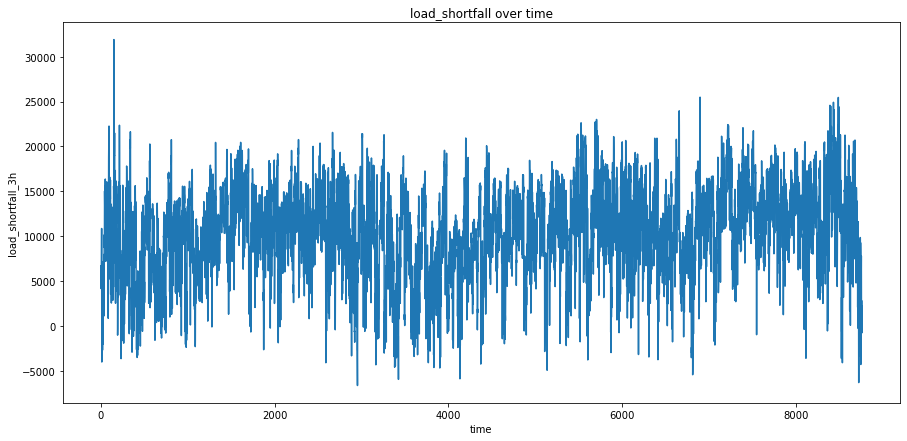

In [9]:
# Value of Exports over time
fig = plt.figure(figsize =(15, 7))
plt.plot(np.arange(len(df.load_shortfall_3h)), df.load_shortfall_3h)
plt.title("load_shortfall over time")
 

plt.xlabel("time")
plt.ylabel("load_shortfall_3h")
plt.show()

- Load shortfall here is  is the difference between the energy generated by means of fossil fuels and renewable sources.

- There are negative ```load short_fall``` values as there are the positive ones, although having more on the +ve axis. This infers that there were days when the energy generated from fossil fuels went so low that renewable energy generated was more.

# plot relevant feature interactions

#### Scatter Plots of the interaction between features with load_shortfall_3h

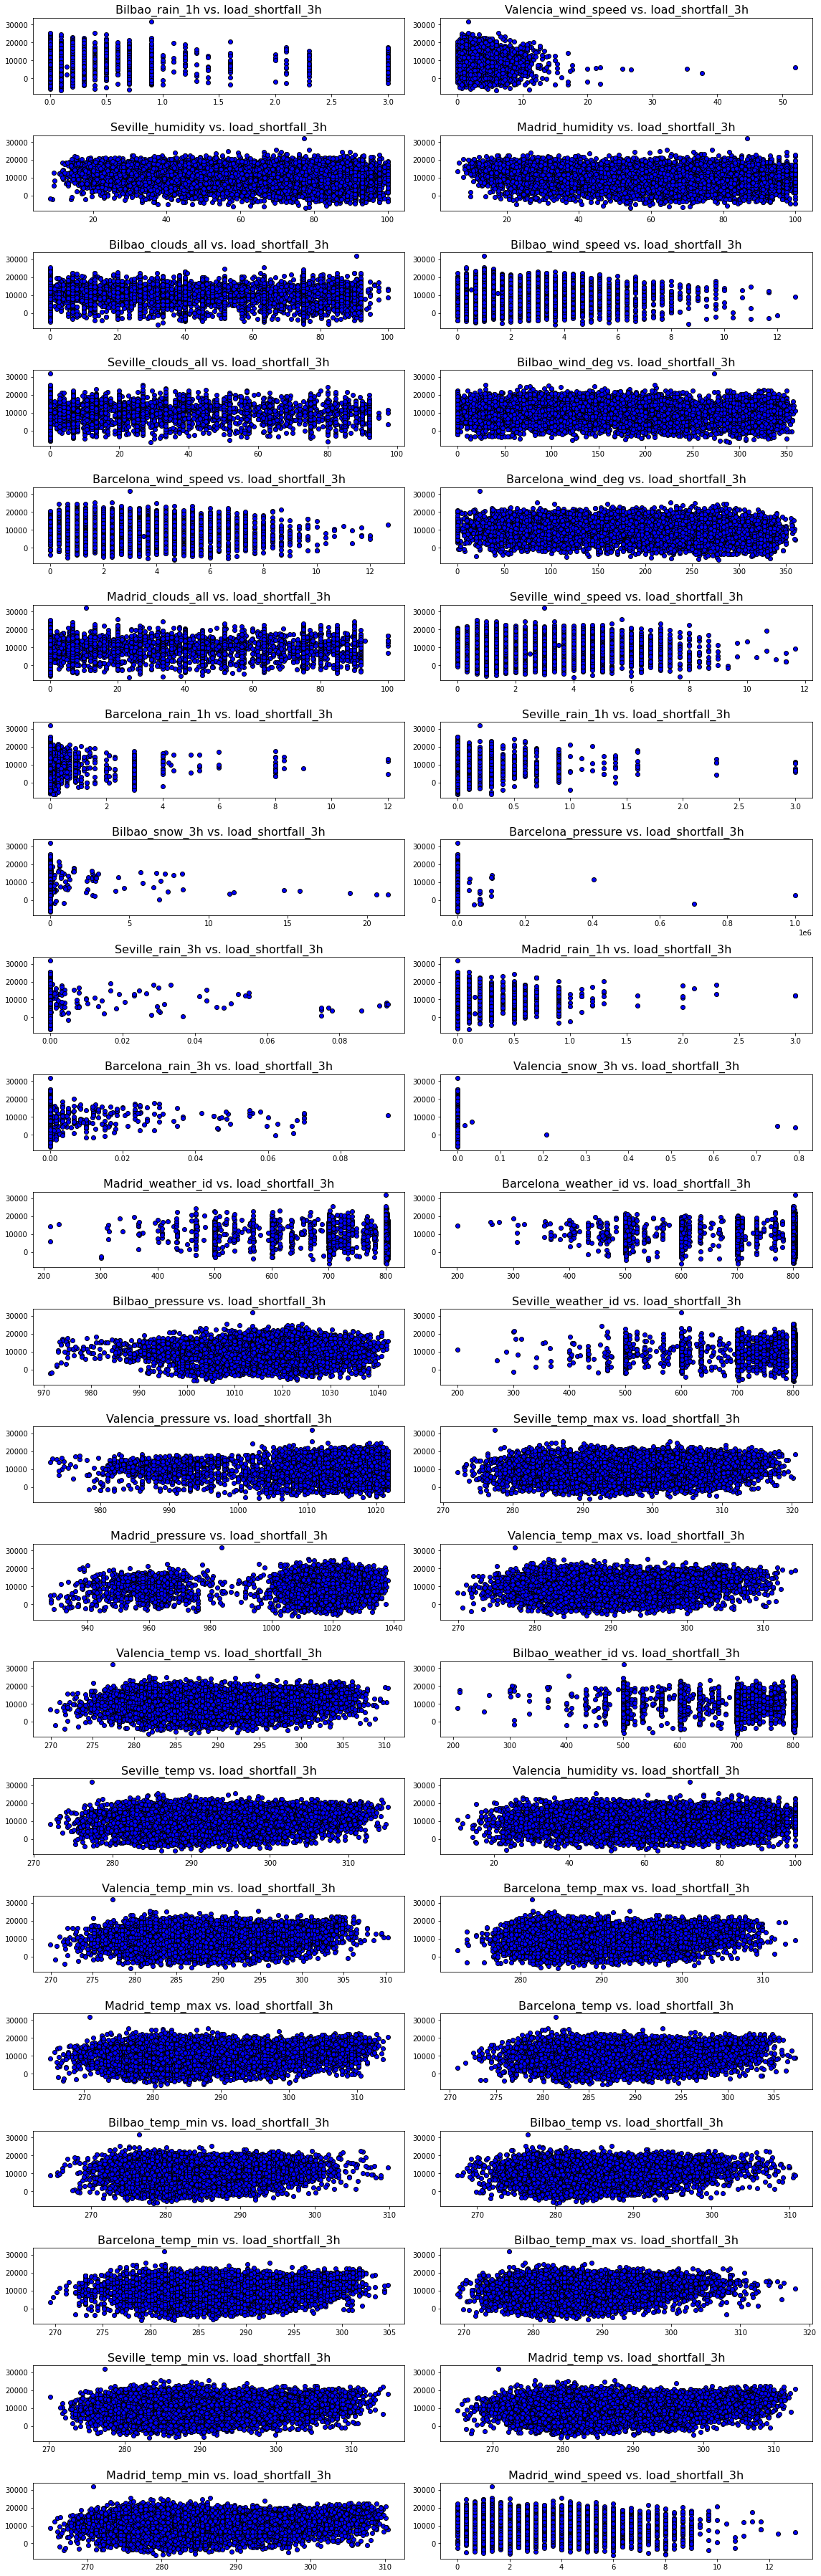

In [10]:
#We ascertain that only numerical variables show in this plot
num_df = df.select_dtypes(include=['number'])
num_df.head(10)

# ....then the plot
fig, axs = plt.subplots(22,2, figsize=(16,50),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(num_df.columns[0:44]):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=num_df[column],y=num_df['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

 - Observe how changes in "Valencia_snow_3h and Barcelona_pressure barely reflects on load_short_fall in the scatter plots above!
 
 - Let us see how these two features, and others like then rank in order of correlation with load_shortfall_3h below. Although it can be barely seen in the scatter plots above, a negative correlation is evaluated owing to the very few points that tend to reduce as load_shortfall_3h increases.

# evaluate correlation

In [11]:
# evaluate correlation
correlations = df.corr()
print(correlations['load_shortfall_3h'].sort_values(ascending=False), '\n')

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

<AxesSubplot:title={'center':'Correlation of Numeric Features with Load Shortfall'}>

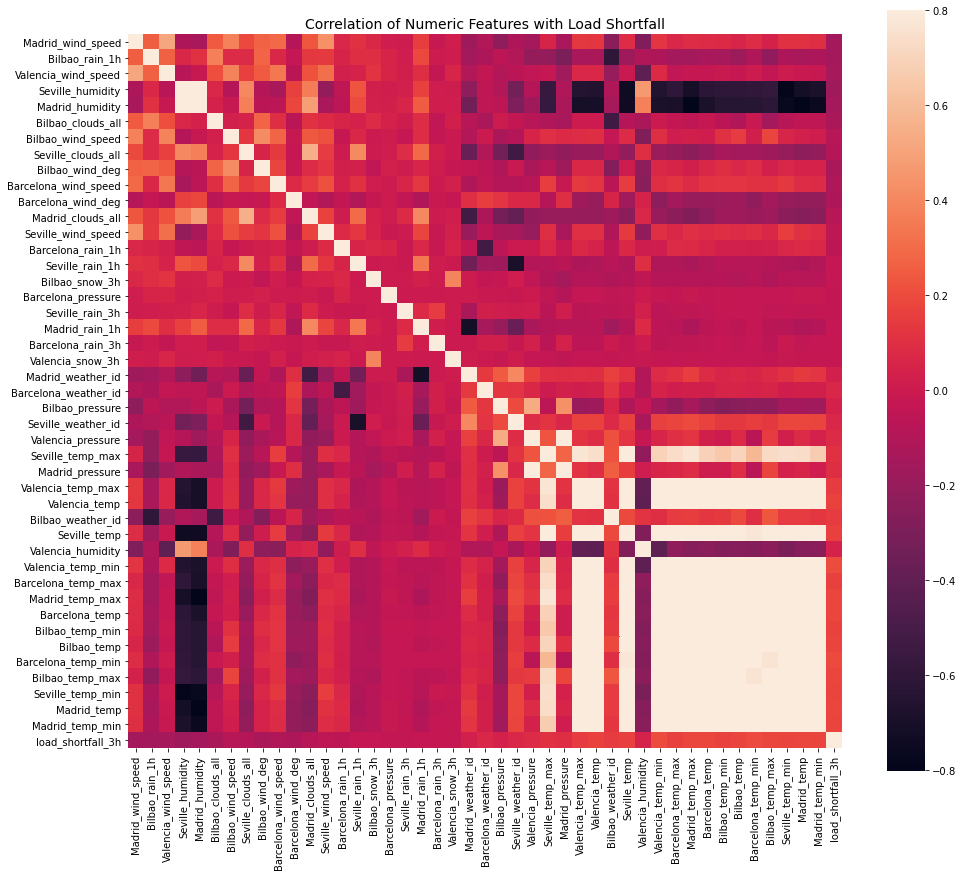

In [12]:
#Using a correlation heatmap, we check for collinearity

f, ax = plt.subplots(figsize=(16,14))
plt.title('Correlation of Numeric Features with Load Shortfall', y=1, size=14)
sns.heatmap(correlations, square=True, vmax=0.8)

**What we see is amazing!**

A lot of the variables are correlated!

Prominent amongst the features are the city-wise **temperature measurements**! We will need to treat this to avoid multillinearity issues with our model.

---
let's have a look at the disribution of all numerical variables.

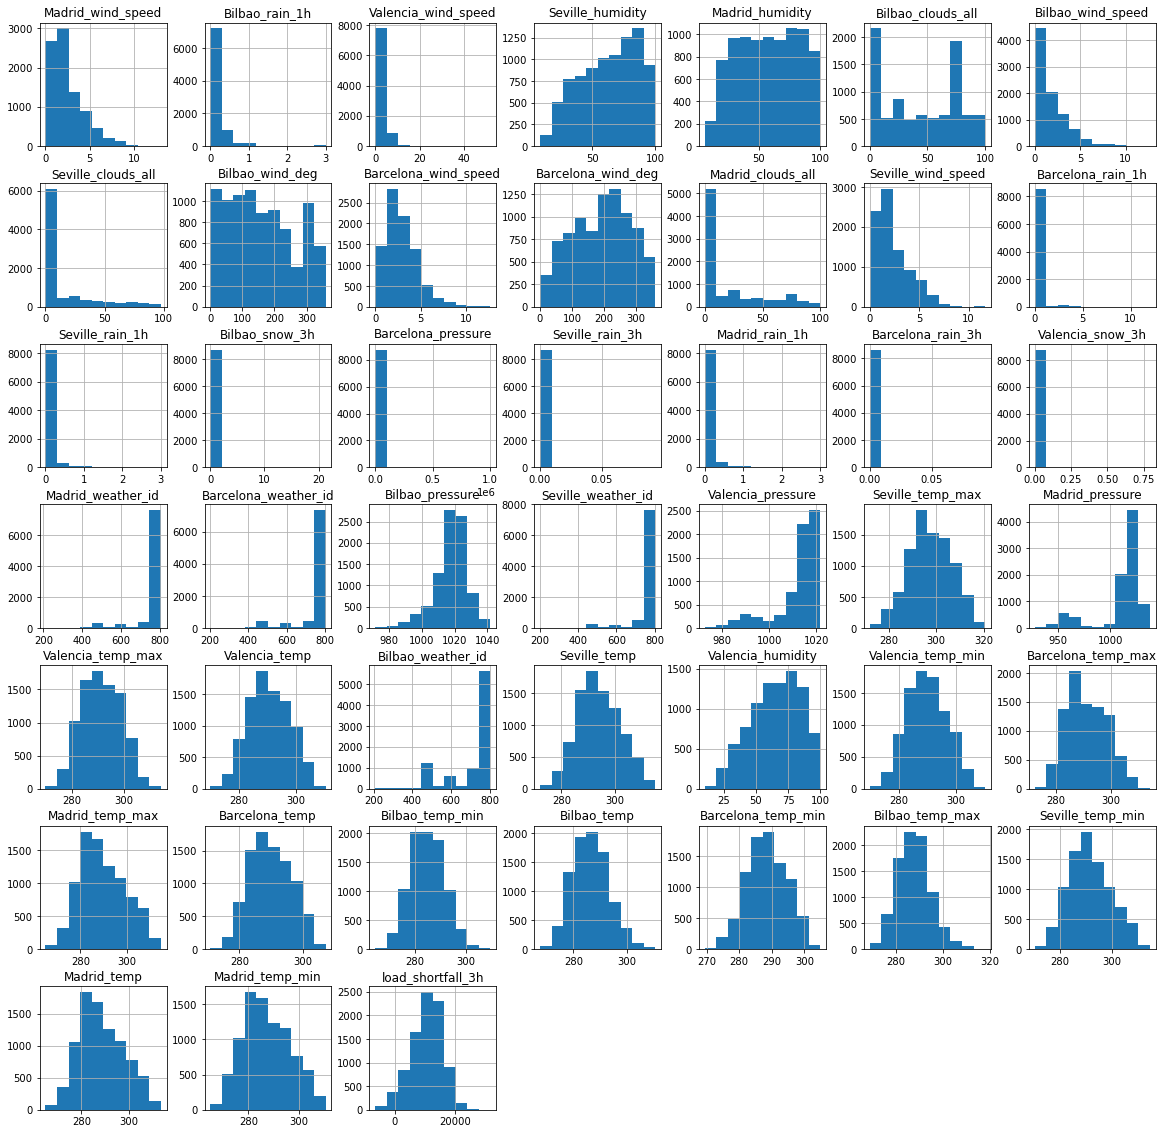

In [13]:
# have a look at feature distributions

features = num_df.columns # created a list of all numerical features
num_df[features].hist(figsize=(20,20));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

We create new features including
<ul>
<li>year</li>
<li>month</li>
<li>day</li>
<li>hour</li>
</ul>

In [14]:
# create new features
#Converting the object in the "time" to datetime 

df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S')


#Creting new features and re-ordering the df
df['year'] = pd.DatetimeIndex(df['time']).year
df_test['year'] = pd.DatetimeIndex(df_test['time']).year

df['month'] = pd.DatetimeIndex(df['time']).month
df_test['month'] = pd.DatetimeIndex(df_test['time']).month

df['day'] = pd.DatetimeIndex(df['time']).day
df_test['day'] = pd.DatetimeIndex(df_test['time']).day

df['hour'] = pd.DatetimeIndex(df['time']).hour
df_test['hour'] = pd.DatetimeIndex(df_test['time']).hour

In [15]:
#Reordering dfs
column_titles = ['time', 'year', 'month', 'day', 'hour', 'Madrid_wind_speed', 
                 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 
                 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 
                 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 
                 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 
                 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 
                 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 
                 'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 
                 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 
                 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 
                 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 
                 'load_shortfall_3h']
column_titles_df_test = ['time', 'year', 'month', 'day', 'hour', 'Madrid_wind_speed', 
                 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 
                 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 
                 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 
                 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 
                 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 
                 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 
                 'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 
                 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 
                 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 
                 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min']
df=df.reindex(columns=column_titles)
df_test=df_test.reindex(columns=column_titles_df_test)

In [16]:
#Fill Valencia_pressure with the mean of each time of the day and day of the month.

for label, row in df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']

        
#For train set
for label, row in df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        df.loc[label, 'Valencia_pressure'] = round((df[(df['year'] == y) & (df['month'] == m)]['Valencia_pressure']).mean(),1) 


#For test set
for label, row in df_test.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        df_test.loc[label, 'Valencia_pressure'] = round((df_test[(df_test['year'] == y) & (df_test['month'] == m)]['Valencia_pressure']).mean(),1)

### Engineering existing features

Create dummy columns for categorical variables and reindexing the columns

In [17]:
#df_dummy =df_dummy.reindex(columns=column_titles)
df_dummies = pd.get_dummies(df)
df_test_dummies = pd.get_dummies(df_test)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 
df_test_dummies.columns = [col.replace(" ","_") for col in df_test_dummies.columns]

Evaluate correlations between variables

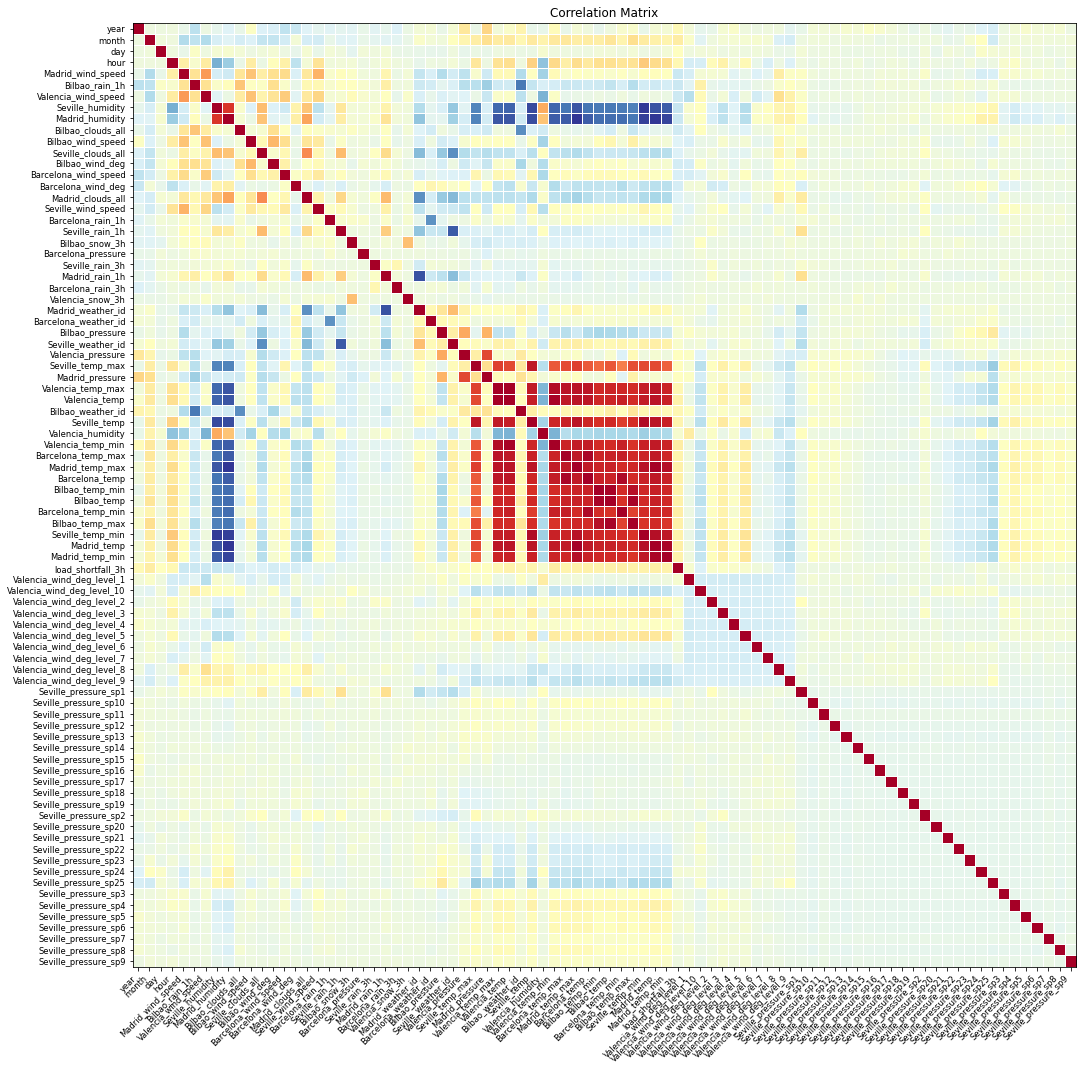

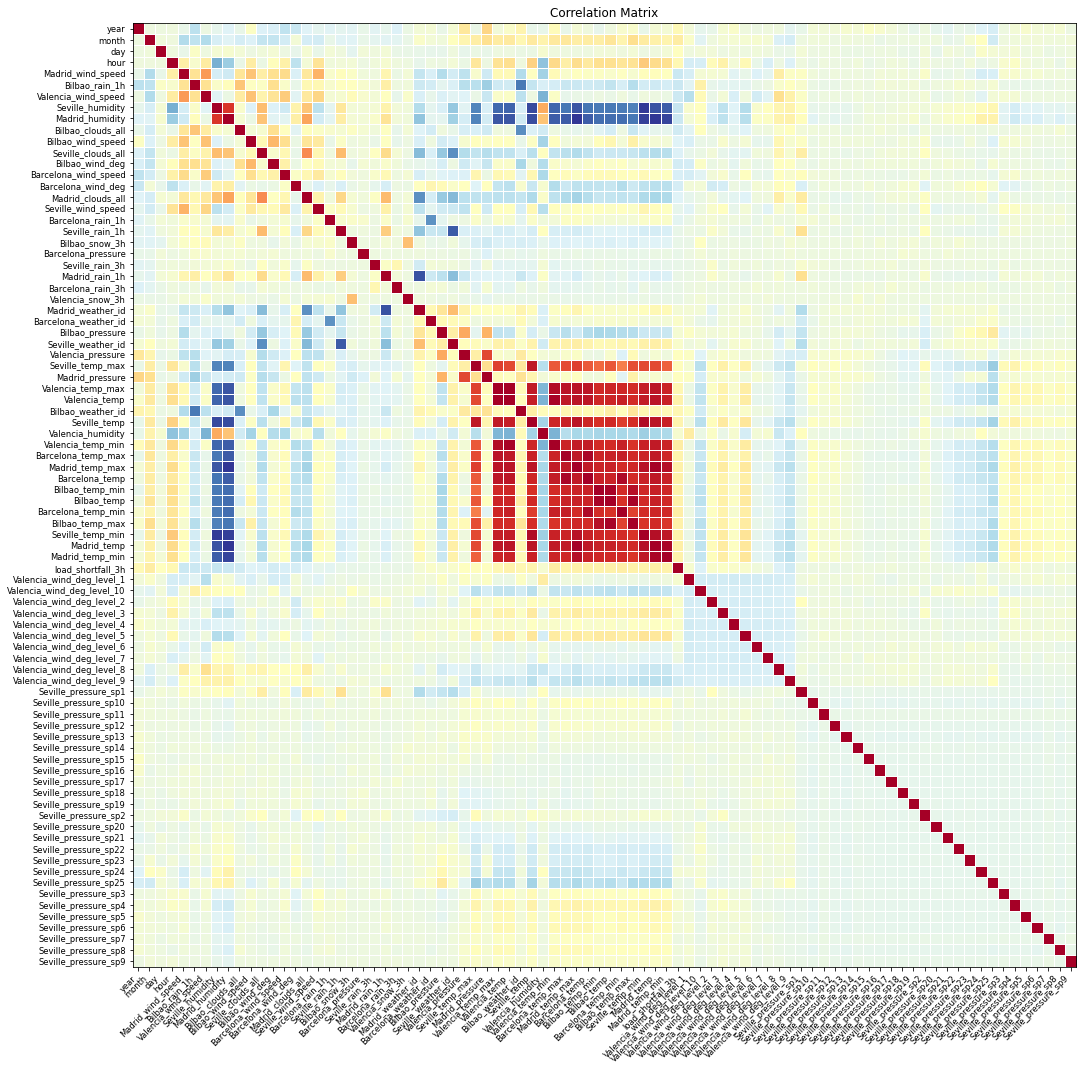

In [18]:
# evaluate correlation
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax=ax)

In [19]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [20]:
#Reindexing the new DF such the load_shortfall_3h becomes the last column.
column_titles = [col for col in df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies=df_dummies.reindex(columns=column_titles)

column_test_titles = [col for col in df_test_dummies.columns if col!= 'load_shortfall_3h']
df_test_dummies=df_test_dummies.reindex(columns=column_test_titles)


df_dummies.head()

,time,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,...,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,load_shortfall_3h
0,2015-01-01 03:00:00,2015,1,1,3,0.666667,0.0,0.666667,74.333333,64.000000,...,0,1,0,0,0,0,0,0,0,6715.666667
1,2015-01-01 06:00:00,2015,1,1,6,0.333333,0.0,1.666667,78.333333,64.666667,...,0,1,0,0,0,0,0,0,0,4171.666667
2,2015-01-01 09:00:00,2015,1,1,9,1.000000,0.0,1.000000,71.333333,64.333333,...,0,1,0,0,0,0,0,0,0,4274.666667
3,2015-01-01 12:00:00,2015,1,1,12,1.000000,0.0,1.000000,65.333333,56.333333,...,0,1,0,0,0,0,0,0,0,5075.666667
4,2015-01-01 15:00:00,2015,1,1,15,1.000000,0.0,1.000000,59.000000,57.000000,...,0,1,0,0,0,0,0,0,0,6620.666667


In [21]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Valencia_wind_deg_level_2,0.060976,0.000000
Bilbao_rain_1h,-0.152510,0.000000
...,...,...
Valencia_snow_3h,-0.021633,0.042863
Seville_pressure_sp6,0.019967,0.061615
Seville_pressure_sp25,-0.019300,0.070831
Seville_pressure_sp5,0.018604,0.081613


_________________________________________________________________________________________________________
Replacing outliers in Valencia_wind_speed with the mean value

In [22]:
Val_wind_sp = df['Valencia_wind_speed'].mean()
df.loc[df['Valencia_wind_speed'] == df['Valencia_wind_speed'].max(), ['Valencia_wind_speed']] = Val_wind_sp
df['Valencia_wind_speed'].max()

37.6666666667

Building model with feature having p valve < 0.05

In [23]:
#Building model with feature having p valve < 0.05
# The dependent variable remains the same:
y_data = df_dummies['load_shortfall_3h']  # y_name = 'load_shortfall_3h'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]
#X_data1 = X_data.values

Check for autocorrelation

In [24]:
#Instead of looking at the whole correlation matrix, it might be easier to isolate 
#the sections of the correlation matrix to where the off-diagonal correlations are high:

# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = (np.where(np.abs(corr) > 0.9) or np.where(np.abs(corr) < -0.9))

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,Seville_temp,Valencia_temp_max,...,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Barcelona_temp_min,0.874447,0.845057,0.964089,0.964089,0.836680,0.838985,0.831689,0.874447,0.779252,0.845057,...,0.836680,0.831689,0.586923,0.879687,0.853881,0.964089,0.836680,0.874447,0.885911,0.779252
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075


Removing variables that highly correlate

In [25]:
#Removing some variable that correlate.

# Lets take a new subset of our potential independent variables
X_remove = ['Valencia_temp_min', 'Valencia_temp_max',
            'Seville_temp_min', 'Seville_temp_max',
            'Bilbao_temp_min', 'Bilbao_temp_max',
            'Barcelona_temp_min', 'Barcelona_temp_max',
            'Madrid_temp_min', 'Madrid_temp_max', 
            'Seville_humidity', 'Madrid_humidity',
            'Valencia_snow_3h', 'Seville_rain_3h']
             
X_corr_names = [col for col in X_names if col not in X_remove]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [26]:
# split data
X_corr_train = X_data[X_corr_names]



X_train, X_val, y_train, y_val = train_test_split(X_corr_train,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

### Create targets and features dataset

Linear Regression

In [27]:
# create one or more ML models
lm = LinearRegression()
#lm.fit(X_train, y_train) #using the training split to fit the model results in lower r-sqaure.
lm.fit(X_corr_train, y_data) 
y_pred_LR = lm.predict(X_val)

#Evaluating R^2 and RMSE values
LR_R2 = r2_score(y_val, y_pred_LR)
LR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_LR))

Bayesian Ridge

In [28]:
reg = linear_model.BayesianRidge()
reg.fit(X_corr_train, y_data)
y_pred_BR = reg.predict(X_val)

#Evaluating R^2 and RMSE values
BR_R2 = r2_score(y_val, y_pred_BR)
BR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_BR))

Decision Tree

In [29]:
regr_tree = DecisionTreeRegressor(max_depth=3)
regr_tree.fit(X_corr_train,y_data)
y_pred_DT = regr_tree.predict(X_val)

#Evaluating R^2 and RMSE values
DT_R2 = r2_score(y_val, y_pred_DT)
DT_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_DT))

Support Vector

In [30]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')
sv_reg.fit(X_corr_train,y_data)
y_pred_SVR = sv_reg.predict(X_val)

#Evaluating R^2 and RMSE values
SVR_R2 = r2_score(y_val, y_pred_SVR)
SVR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_SVR))

Voting Regressor

In [31]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LR",lm),("BR",reg), ("DT",regr_tree)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.5,0.05,0.45])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

v_reg.fit(X_corr_train,y_data)
y_pred_VR = v_reg.predict(X_val)

#Evaluating R^2 and RMSE values
VR_R2 = r2_score(y_val, y_pred_VR)
VR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_VR))

Stacking

In [32]:
# For clarity, we declare our model list again here 
models = [("LR",lm), ("DT",regr_tree), ("SVR",sv_reg)]

# Instead of choosing model weightings, we now declare the meta learner 
# model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()#BayesianRidge() 

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

s_reg.fit(X_corr_train,y_data)
y_pred_SR = s_reg.predict(X_val)

#Evaluating R^2 and RMSE values
SR_R2 = r2_score(y_val, y_pred_SR)
SR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_SR))

Bagging

In [33]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=10)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree)

bag_reg.fit(X_corr_train,y_data)
y_pred_BgR = bag_reg.predict(X_val)

#Evaluating R^2 and RMSE values
BgR_R2 = r2_score(y_val, y_pred_BgR)
BgR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_BgR))

Random Forest

In [34]:


# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=50, max_depth=9)
RF.fit(X_corr_train,y_data)
y_pred_RF = RF.predict(X_val)

#Evaluating R^2 and RMSE values
RF_R2 = r2_score(y_val, y_pred_RF)
RF_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_RF))

AdaBoost

In [41]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=7)
# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(base_estimator = d_tree)

bst_reg.fit(X_corr_train,y_data)
y_pred_AR = bst_reg.predict(X_val)

#Evaluating R^2 and RMSE values
AR_R2 = r2_score(y_val, y_pred_AR)
AR_RMSE = np.sqrt(mean_squared_error(y_val,y_pred_AR))

Let us take a look at the R-squared and RMSE of each model prediction on the validation set.

In [36]:
# evaluate one or more ML models
print("Linear Reg R^2: ", r2_score(y_val, y_pred_LR))
print("Linear Reg RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_LR)))

print("BayesianRidge R^2: ", r2_score(y_val, y_pred_BR))
print("BayesianRidge RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_BR)))

print("Decision Tree R^2: ", r2_score(y_val, y_pred_DT))
print("Decision Tree RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_DT)))

print("support vector regression R^2: ", r2_score(y_val, y_pred_SVR))
print("support vector regression RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_SVR)))

print("Voting Regressor R^2: ", r2_score(y_val, y_pred_VR))
print("Voting Regressor RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_VR)))

print("Stacking Regressor R^2: ", r2_score(y_val, y_pred_SR))
print("Stacking Regressor RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_SR)))

print("Bagging Regressor R^2: ", r2_score(y_val, y_pred_BgR))
print("Bagging Regressor RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_BgR)))

print("AdaBoost R^2: ", r2_score(y_val, y_pred_AR))
print("AdaBoost RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_AR)))

print("Random Forest R^2: ", r2_score(y_val, y_pred_RF))
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_val,y_pred_RF)))

Linear Reg R^2:  0.12972463598619688
Linear Reg RMSE:  4549.389471809949
BayesianRidge R^2:  0.11704618730956617
BayesianRidge RMSE:  4582.408127438893
Decision Tree R^2:  0.10803954028377216
Decision Tree RMSE:  4605.7204544005335
support vector regression R^2:  -0.12875956089940854
support vector regression RMSE:  5181.141990675359
Voting Regressor R^2:  0.16635813004547073
Voting Regressor RMSE:  4452.608725135285
Stacking Regressor R^2:  0.07656939369555826
Stacking Regressor RMSE:  4686.265672172028
Bagging Regressor R^2:  0.6560868523772698
Bagging Regressor RMSE:  2859.8889053723865
AdaBoost R^2:  0.6251571370097783
AdaBoost RMSE:  2985.722195246466
Random Forest R^2:  0.6177178093253031
Random Forest RMSE:  3015.2047352838363


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [51]:
# Comparing model performance

models = ['Linear Regression','BayesianRidge','Decision Tree','Support Vector','Voting Regressor','Stacking Regressor',
          'Bagging Regressor','AdaBoost Regressor','Random Forest Regressor']
Train_RMSE = [LR_R2, BR_R2, DT_R2, SVR_R2, VR_R2, SR_R2, BgR_R2, AR_R2, RF_R2]
Test_RMSE = [LR_RMSE, BR_RMSE, DT_RMSE, SVR_RMSE, VR_RMSE, SR_RMSE, BgR_RMSE, AR_RMSE, RF_RMSE]
models_dict = {"Model": models, "R^2": Train_RMSE, "RMSE": Test_RMSE}

df_models = pd.DataFrame(models_dict)
df_models.sort_values(by='RMSE', ascending=True)

,Model,R^2,RMSE
6,Bagging Regressor,0.656087,2859.888905
7,AdaBoost Regressor,0.628256,2973.356458
8,Random Forest Regressor,0.617718,3015.204735
4,Voting Regressor,0.166358,4452.608725
0,Linear Regression,0.129725,4549.389472
1,BayesianRidge,0.117046,4582.408127
2,Decision Tree,0.108040,4605.720454
5,Stacking Regressor,0.076569,4686.265672
3,Support Vector,-0.128760,5181.141991


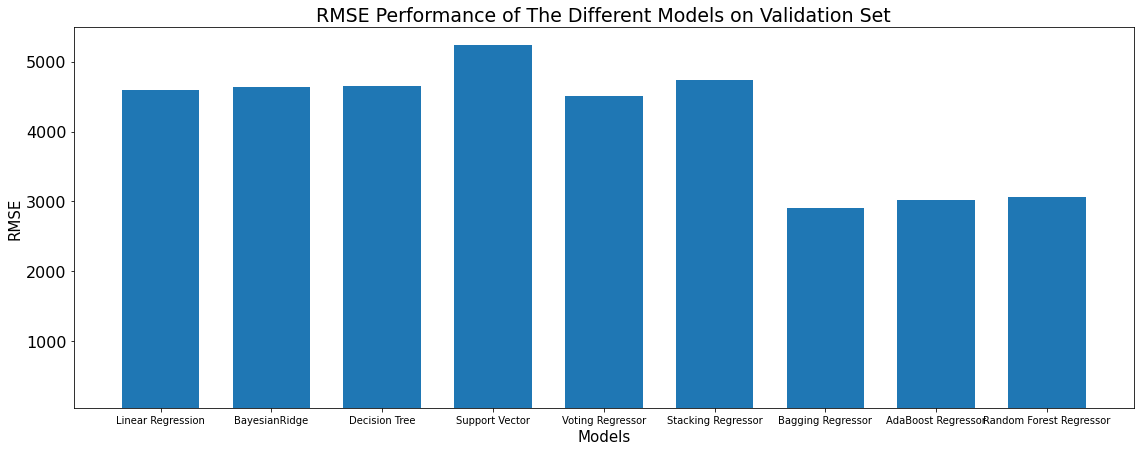

In [84]:
# Constructing a Barplot to visualize the RMSE performance of the models

plt.figure(figsize=[19, 7])
plt.bar(df_models['Model'], df_models['RMSE'], width=0.7, bottom=50, align='center')

plt.title('RMSE Performance of The Different Models on Validation Set', fontsize=19)
plt.xlabel('Models', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.show()

### Choosing the best model

In [ ]:
#

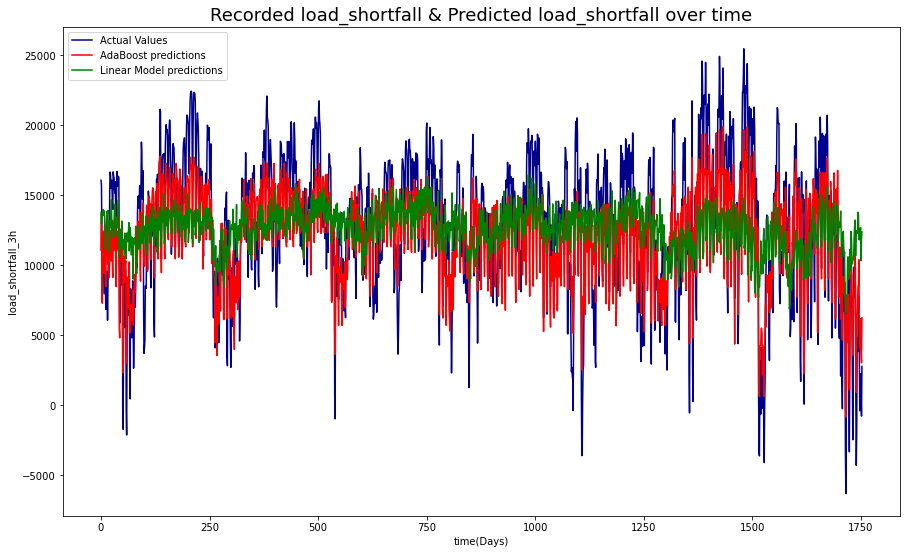

In [78]:
#Create a Prediction from the Validation data(X_val) using the AdaBoost Regressor model & Linear model
ARmodel_pred = bst_reg.predict(X_val)
LMmodel_pred = lm.predict(X_val)

#Creating a plot that compares actual y_val with AdaBoost Predicted values
fig = plt.figure(figsize =(15, 9))
plt.plot(np.arange(len(y_val)), y_val, color='darkblue', label = 'Actual Values')
plt.plot(np.arange(len(y_val)), ARmodel_pred, color="red", label = 'AdaBoost predictions')
plt.plot(np.arange(len(y_val)), LMmodel_pred, color="green", label = 'Linear Model predictions')
plt.title("Recorded load_shortfall & Predicted load_shortfall over time", fontsize=18)

plt.xlabel("time(Days)")
plt.ylabel("load_shortfall_3h")
plt.legend()
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic



In [63]:
#Saving One or More Models

import pickle

model_save_path = "LinearRegression_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm,file)